In [1]:
import sys
sys.path.append('../')

from TFControl import TFStepper

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 12

from tinkerforge.ip_connection import IPConnection
#from tinkerforge.brick_stepper import BrickStepper
from tinkerforge.bricklet_humidity import BrickletHumidity
from tinkerforge.bricklet_temperature import BrickletTemperature
#from tinkerforge.bricklet_io4 import BrickletIO4

from IPython.display import clear_output
import time
from datetime import datetime

In [2]:
HOST = 'localhost'
PORT = 4223

STEPPER_UID = '6e6afb' # Can be found in BrickViewer program
HUMIDITY_UID = 'keg'
TEMP_UID = '6Jf'
IO_UID = '8Qy'

In [3]:
ipcon = IPConnection()

stepper = TFStepper(STEPPER_UID, IO_UID, 3, ipcon)
humiditySensor = BrickletHumidity(HUMIDITY_UID, ipcon)
temperatureSensor = BrickletTemperature(TEMP_UID, ipcon)
#ioBricklet = BrickletIO4(IO_UID, ipcon)

ipcon.connect(HOST, PORT)

#for k,v in ipcon.devices.items():
#    print(v)

In [4]:
stepper.set_motor_current(800) # In mA
stepper.set_step_mode(8) # Options are 8, 4, 2, 1
stepper.set_max_velocity(2000) # In steps/s

stepper.set_speed_ramping(500, 1000) # Acceleration and decceleration, in steps/s

In [16]:
bool(int(format(stepper._ioBricklet.get_value(), "04b")[0]))

False

In [5]:
stepper.enable()
stepper.set_steps(5000)

In [5]:
stepper.resetPosition()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "c:\users\jack\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py", line 3441, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Jack\AppData\Local\Temp/ipykernel_13648/1796035928.py", line 1, in <module>
    stepper.resetPosition()
  File "C:\Users\Jack\Documents\Python\Rubies\test\..\TFControl\Control.py", line 57, in resetPosition
    while self.isInBounds():
  File "C:\Users\Jack\Documents\Python\Rubies\test\..\TFControl\Control.py", line 40, in isInBounds
    return bool(format(self._ioBricklet.get_value(), "04b")[3 - self._ioPort])
  File "c:\users\jack\appdata\local\programs\python\python38\lib\site-packages\tinkerforge\bricklet_io4.py", line 117, in get_value
    return self.ipcon.send_request(self, BrickletIO4.FUNCTION_GET_VALUE, (), '', 9, 'B')
  File "c:\users\jack\appdata\local\programs\python\python38\lib\site-packages\tinkerforge\ip_connection.py", line 1305, 

TypeError: object of type 'NoneType' has no len()

In [8]:
# What happens once the stepper reaches it's target position
def stepperCallback(position, stepper):
    stepper.set_steps(-1) # Move one step forward

In [12]:
print(bool(format(ioBricklet.get_value(), "04b")[0]))

True


In [13]:
stepper.enable()

stepper.set_steps(1000)

#stepper.disable()

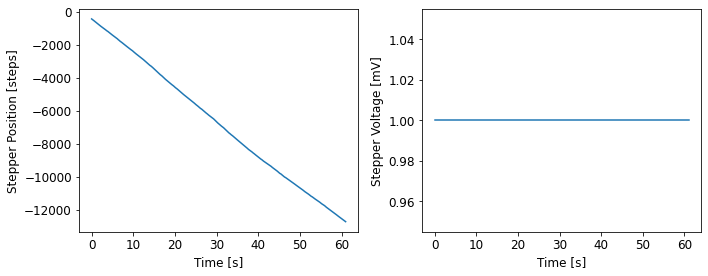

In [9]:
stepper.enable()

timeArr = []
humidityArr = []
positionArr = []
valueArr = []

start = datetime.now()

#stepper.set_steps(-5000)
stepper.register_callback(stepper.CALLBACK_POSITION_REACHED,
                        lambda x: stepperCallback(x, stepper))
stepper.set_steps(-1)

#while abs(stepper.get_remaining_steps()) > 0:
#while int(format(ioBricklet.get_value(), "04b")[0]) == 1:
while int(format(ioBricklet.get_value(), "04b")[0]):
    #stepper.set_steps(-1)
    
    dt = datetime.now() - start
    timeArr.append(dt.microseconds / 1e6 + dt.seconds)
    humidityArr.append(humiditySensor.get_humidity())
    positionArr.append(stepper.get_current_position())
    valueArr.append(int(format(ioBricklet.get_value(), "04b")[0]))
    
    clear_output(wait=True)
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))

    ax[0].plot(timeArr, positionArr)
    ax[0].set_xlabel('Time [s]')
    ax[0].set_ylabel('Stepper Position [steps]')

    ax[1].plot(timeArr, valueArr)
    ax[1].set_xlabel('Time [s]')
    ax[1].set_ylabel('Stepper Voltage [mV]')

    fig.tight_layout()
    plt.show()
        
humidityArr = [h/10 for h in humidityArr] # Convert to percent

stepper.stop()
stepper.set_current_position(0)
time.sleep(1)
stepper.disable()

In [6]:
stepper.stop()
stepper.disable()

In [1]:
ipcon.disconnect()

NameError: name 'ipcon' is not defined

Docstring: Return ctime() style string.
Type:      method_descriptor


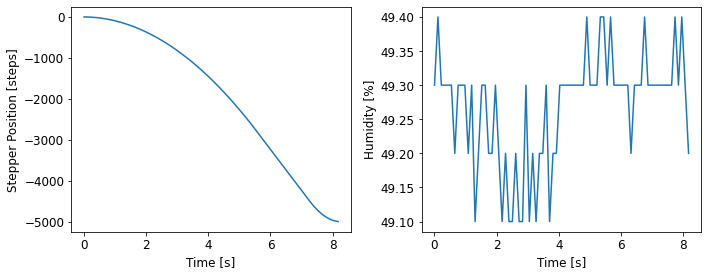

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].plot(timeArr, positionArr)
ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('Stepper Position [steps]')

ax[1].plot(timeArr, humidityArr)
ax[1].set_xlabel('Time [s]')
ax[1].set_ylabel('Humidity [%]')

fig.tight_layout()
plt.show()